#Telco Customer Churn Analysis

Subject: Predicting Customer Churn in Telecommunications Sector

Our project will follow a 7-step methodology that is closely aligned with well-known frameworks used in data science projects, such as CRISP-DM, Microsoft TDSP, and KDnuggets Modern Data Science Process. The 7-steps are as follows:

1. Data Integration and Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Predictive Modelling
5. Model Evaluation
6. Explainability and Visualisation
7. Business Recommendations


## Environment Setput and Configuration

In [1]:
# For Google Colab: Mount Google Drive

from google.colab import drive
from pathlib import Path
import os

drive.mount('/content/drive')

# Define paths
project_path = '/content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/'
#project_path = '/content/drive/MyDrive/Colab Notebooks/Bootcamp/TP2/Telco_Churn_Project/'

data_path = project_path + '01_Data/'
notebook_path = project_path + '02_Notebooks/'
output_path = project_path + '03_Outputs/'

#Import python libraries
!pip install polars[excel]

#import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

print("Setup has been completed")

Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 16.8 MB/s eta 0:00:00
Setup has been completed


## Upload Data to Dataframes


In [2]:
demographics_df = pl.read_excel(f"{data_path}Telco_customer_churn_demographics.xlsx")
status_df      = pl.read_excel(f"{data_path}Telco_customer_churn_status.xlsx")
population_df  = pl.read_excel(f"{data_path}Telco_customer_churn_population.xlsx")
location_df    = pl.read_excel(f"{data_path}Telco_customer_churn_location.xlsx")
services_df    = pl.read_excel(f"{data_path}Telco_customer_churn_services.xlsx")

print(f"  - Demographics: {demographics_df.shape}")
print(f"  - Status: {status_df.shape}")
print(f"  - Population: {population_df.shape}")
print(f"  - Location: {location_df.shape}")
print(f"  - Services: {services_df.shape}")

print(f" *** All external files were sucessfully imported ***")

  - Demographics: (7043, 9)
  - Status: (7043, 11)
  - Population: (1671, 3)
  - Location: (7043, 9)
  - Services: (7043, 30)
 *** All external files were sucessfully imported ***


#1.Data Integration and Cleaning

**1.1 - Data Knowledge: Display schema and head rows of each dataframe**

In [3]:
#print(f"demographics_df.schema: {demographics_df.schema}")
print("demographics_df.schema & head rows")
display(demographics_df.head(5))


demographics_df.schema & head rows


Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
str,i64,str,i64,str,str,str,str,i64
"""8779-QRDMV""",1,"""Male""",78,"""No""","""Yes""","""No""","""No""",0
"""7495-OOKFY""",1,"""Female""",74,"""No""","""Yes""","""Yes""","""Yes""",1
"""1658-BYGOY""",1,"""Male""",71,"""No""","""Yes""","""No""","""Yes""",3
"""4598-XLKNJ""",1,"""Female""",78,"""No""","""Yes""","""Yes""","""Yes""",1
"""4846-WHAFZ""",1,"""Female""",80,"""No""","""Yes""","""Yes""","""Yes""",1


In [4]:
print("status_df.schema & head rows")
display(status_df.head(5))


status_df.schema & head rows


Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
str,i64,str,i64,str,str,i64,i64,i64,str,str
"""8779-QRDMV""",1,"""Q3""",3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data"""
"""7495-OOKFY""",1,"""Q3""",3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer"""
"""1658-BYGOY""",1,"""Q3""",2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer"""
"""4598-XLKNJ""",1,"""Q3""",2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services"""
"""4846-WHAFZ""",1,"""Q3""",2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges"""


In [5]:

print("population_df.schema & head rows")
display(population_df.head(5))


population_df.schema & head rows


ID,Zip Code,Population
i64,i64,i64
1,90001,54492
2,90002,44586
3,90003,58198
4,90004,67852
5,90005,43019


In [6]:
print("location_df.schema & head rows")
display(location_df.head(5))


location_df.schema & head rows


Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
str,i64,str,str,str,i64,str,f64,f64
"""8779-QRDMV""",1,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582
"""7495-OOKFY""",1,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237
"""1658-BYGOY""",1,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715
"""4598-XLKNJ""",1,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639
"""4846-WHAFZ""",1,"""United States""","""California""","""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188


In [7]:
print("services_df.schema & head rows")
display(services_df.head(5))

services_df.schema & head rows


Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
str,i64,str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64
"""8779-QRDMV""",1,"""Q3""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65
"""7495-OOKFY""",1,"""Q3""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1
"""1658-BYGOY""",1,"""Q3""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88
"""4598-XLKNJ""",1,"""Q3""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07
"""4846-WHAFZ""",1,"""Q3""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36


**1.2 - Data Consolidation: Include all data in one dataframe**


In [8]:
print("\n1.2 Merging datasets...")

# Start with demographics as base
df = demographics_df.clone()   #

# Merge location, services, status and population data
df = df.join(location_df, on="Customer ID", how="left", suffix="_loc")
df = df.join(services_df, on="Customer ID", how="left", suffix="_svc")
df = df.join(status_df, on="Customer ID", how="left", suffix="_sts")
df = df.join(
    population_df.select(["Zip Code", "Population"]),
    on="Zip Code",
    how="left"
)

print(f"  - Merged dataset shape: {df.shape}")



1.2 Merging datasets...
  - Merged dataset shape: (7043, 57)


In [9]:
#print("df.schema & head rows")
display(df.head(5))

Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Count_loc,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Count_svc,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Count_sts,Quarter_sts,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Population
str,i64,str,i64,str,str,str,str,i64,i64,str,str,str,i64,str,f64,f64,i64,str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64
"""8779-QRDMV""",1,"""Male""",78,"""No""","""Yes""","""No""","""No""",0,1,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,1,"""Q3""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65,1,"""Q3""",3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data""",68701
"""7495-OOKFY""",1,"""Female""",74,"""No""","""Yes""","""Yes""","""Yes""",1,1,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,1,"""Q3""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1,1,"""Q3""",3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer""",55668
"""1658-BYGOY""",1,"""Male""",71,"""No""","""Yes""","""No""","""Yes""",3,1,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,1,"""Q3""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88,1,"""Q3""",2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer""",47534
"""4598-XLKNJ""",1,"""Female""",78,"""No""","""Yes""","""Yes""","""Yes""",1,1,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,1,"""Q3""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07,1,"""Q3""",2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services""",27778
"""4846-WHAFZ""",1,"""Female""",80,"""No""","""Yes""","""Yes""","""Yes""",1,1,"""United States""","""California""","""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188,1,"""Q3""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36,1,"""Q3""",2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges""",26265


**1.3 - Data Consolidation: Remove duplicated columns**

In [10]:
print("\n1.3 Removing duplicate columns...")

# Identify columns with suffixes
cols_to_drop = [
    col for col in df.columns
    if col.endswith("_loc") or col.endswith("_svc") or col.endswith("_sts")
]

# Drop them
df = df.drop(cols_to_drop)

print(f"  - Dropped {len(cols_to_drop)} duplicate columns")
print(f"  - Final dataset shape: {df.shape}")

#print("df.schema & head rows")
display(df.head(5))



1.3 Removing duplicate columns...
  - Dropped 4 duplicate columns
  - Final dataset shape: (7043, 53)


Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason,Population
str,i64,str,i64,str,str,str,str,i64,str,str,str,i64,str,f64,f64,str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,i64,str,str,i64,i64,i64,str,str,i64
"""8779-QRDMV""",1,"""Male""",78,"""No""","""Yes""","""No""","""No""",0,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,"""Q3""","""No""",0,1,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",39.65,39.65,0.0,20,0.0,59.65,3,"""Churned""","""Yes""",1,91,5433,"""Competitor""","""Competitor offered more data""",68701
"""7495-OOKFY""",1,"""Female""",74,"""No""","""Yes""","""Yes""","""Yes""",1,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,"""Q3""","""Yes""",1,8,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Credit Card""",80.65,633.3,0.0,0,390.8,1024.1,3,"""Churned""","""Yes""",1,69,5302,"""Competitor""","""Competitor made better offer""",55668
"""1658-BYGOY""",1,"""Male""",71,"""No""","""Yes""","""No""","""Yes""",3,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,"""Q3""","""No""",0,18,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",95.45,1752.55,45.61,0,203.94,1910.88,2,"""Churned""","""Yes""",1,81,3179,"""Competitor""","""Competitor made better offer""",47534
"""4598-XLKNJ""",1,"""Female""",78,"""No""","""Yes""","""Yes""","""Yes""",1,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,"""Q3""","""Yes""",1,25,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",98.5,2514.5,13.43,0,494.0,2995.07,2,"""Churned""","""Yes""",1,88,5337,"""Dissatisfaction""","""Limited range of services""",27778
"""4846-WHAFZ""",1,"""Female""",80,"""No""","""Yes""","""Yes""","""Yes""",1,"""United States""","""California""","""Whittier""",90602,"""33.972119, -118.020188""",33.972119,-118.020188,"""Q3""","""Yes""",1,37,"""Offer C""","""Yes""",6.33,"""Yes""","""Yes""","""Fiber Optic""",14,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""","""Bank Withdrawal""",76.5,2868.15,0.0,0,234.21,3102.36,2,"""Churned""","""Yes""",1,67,2793,"""Price""","""Extra data charges""",26265


**1.4 - Data Consolidation: Check Missing Values**

In [11]:
print("\n1.4 Checking for missing values...")

# Count missing values per column
missing_summary = (
    pl.DataFrame({
        "Column": df.columns,
        "Missing_Count": [df[col].null_count() for col in df.columns],
    })
    .with_columns([
        (pl.col("Missing_Count") / len(df) * 100)
        .round(2)
        .alias("Missing_Percentage")
    ])
    .filter(pl.col("Missing_Count") > 0)
    .sort("Missing_Count", descending=True)
)

if missing_summary.height > 0:
    print("\nColumns with missing values:")
    print(missing_summary)
else:
    print(" --- No missing values found --- ")



1.4 Checking for missing values...

Columns with missing values:
shape: (2, 3)
┌────────────────┬───────────────┬────────────────────┐
│ Column         ┆ Missing_Count ┆ Missing_Percentage │
│ ---            ┆ ---           ┆ ---                │
│ str            ┆ i64           ┆ f64                │
╞════════════════╪═══════════════╪════════════════════╡
│ Churn Category ┆ 5174          ┆ 73.46              │
│ Churn Reason   ┆ 5174          ┆ 73.46              │
└────────────────┴───────────────┴────────────────────┘


A**ttention to this:** The Churn Category and Churn Reason fields are mostly empty. This will be limiting because these features could be important to the prediction model.

**1.5 - Data Consolidation: Save integrated dataset & Create data dictionary**

In [12]:
print("\n1.5 Saving integrated dataset...")

# Save integrated dataset
df.write_csv(f"{output_path}telco_churn_integrated.csv")
print(f" Saved to: {output_path}telco_churn_integrated.csv")



1.5 Saving integrated dataset...
 Saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/telco_churn_integrated.csv


In [13]:
# Create data dictionary
print(" Creating data dictionary...")

data_dict = pl.DataFrame({
    "Variable": df.columns,
    "Type": [str(dtype) for dtype in df.dtypes],
    "Non_Null_Count": [df[col].len() - df[col].null_count() for col in df.columns],
    "Unique_Values": [df[col].n_unique() for col in df.columns],
    "Sample_Values": [
        str(df[col].drop_nulls().unique().limit(3).to_list()) for col in df.columns
    ],
})

# Save dictionary
data_dict.write_csv(f"{output_path}data_dictionary.csv")
print(f" Data dictionary saved to: {output_path}data_dictionary.csv")

 Creating data dictionary...
 Data dictionary saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/data_dictionary.csv


#2.Exploratory Data Analysis

**2.1 - Target variable distribution**

In [14]:
import plotly.express as px

print("\n2.1. Target Variable Distribution (Churn Label)...")

# --- Compute churn counts and percentages ---
churn_stats = (
    df.group_by("Churn Label")
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum() * 100)
          .round(2)
          .alias("Percentage")
      )
      .sort("Churn Label")
)

print("\nChurn Distribution:")
for row in churn_stats.iter_rows(named=True):
    print(f"  - {row['Churn Label']}: {row['Count']} ({row['Percentage']:.2f}%)")

# --- Prepare data for Plotly pie chart ---
churn_counts = churn_stats.select(["Churn Label", "Count"]).to_pandas()

fig = px.pie(
    churn_counts,
    values="Count",
    names="Churn Label",
    title="Customer Churn Distribution",
    color_discrete_sequence=["#2ecc71", "#e74c3c"]
)

fig.write_html(f"{output_path}churn_distribution.html")
print(f"  ✓ Visualization saved: {output_path}churn_distribution.html")



2.1. Target Variable Distribution (Churn Label)...

Churn Distribution:
  - No: 5174 (73.46%)
  - Yes: 1869 (26.54%)
  ✓ Visualization saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/churn_distribution.html


**Attention to this:** The dataset is strongly unbalanced, and this issue must be addressed.

**2.2 - Descritive Statistics**

In [15]:
print("\n2.2 Descriptive Statistics for Numerical Variables...")

# Select only numeric columns
numerical_cols = [
    col for col, dtype in df.schema.items()
    if dtype in (pl.Int8, pl.Int16, pl.Int32, pl.Int64,
                 pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64,
                 pl.Float32, pl.Float64)
]

desc_stats = df.select(numerical_cols).describe()
display(desc_stats)

# Save to CSV
desc_stats.write_csv(f"{output_path}descriptive_statistics.csv")

print(f"Descriptive Statistics saved to: {output_path}descriptive_statistics.csv")



2.2 Descriptive Statistics for Numerical Variables...


statistic,Count,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Value,Churn Score,CLTV,Population
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0,7043.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.0,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,3.244924,0.26537,58.50504,4400.295755,22139.603294
"""std""",0.0,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,15.448113,20.41894,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,1.201657,0.441561,21.170031,1183.057152,21152.392837
"""min""",1.0,19.0,0.0,90001.0,32.555828,-124.301372,0.0,1.0,0.0,0.0,18.25,18.8,0.0,0.0,0.0,21.36,1.0,0.0,5.0,2003.0,11.0
"""25%""",1.0,32.0,0.0,92101.0,33.990646,-121.78809,0.0,9.0,9.21,3.0,35.5,400.3,0.0,0.0,70.59,605.75,3.0,0.0,40.0,3469.0,2344.0
"""50%""",1.0,46.0,0.0,93518.0,36.205465,-119.595293,0.0,29.0,22.89,17.0,70.35,1394.55,0.0,0.0,401.44,2108.64,3.0,0.0,61.0,4527.0,17554.0
"""75%""",1.0,60.0,0.0,95329.0,38.161321,-117.969795,3.0,55.0,36.4,27.0,89.85,3789.2,0.0,0.0,1191.5,4801.93,4.0,1.0,76.0,5381.0,36125.0
"""max""",1.0,80.0,9.0,96150.0,41.962127,-114.192901,11.0,72.0,49.99,85.0,118.75,8684.8,49.79,150.0,3564.72,11979.34,5.0,1.0,96.0,6500.0,105285.0


Descriptive Statistics saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/descriptive_statistics.csv


**2.3 - Analysing Churn by demographic variables**

In [16]:
def ensure_no_yes_order(df, id_col):
    desired_order = [id_col, "No", "Yes"]
    return df.select([c for c in desired_order if c in df.columns])

# By Gender ********************
gender_churn = (
    df.group_by(["Gender", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Gender") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Gender",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Gender")
)

print("\nChurn Rate by Gender (%):")
gender_churn = ensure_no_yes_order(gender_churn, "Gender")
print(gender_churn)



Churn Rate by Gender (%):
shape: (2, 3)
┌────────┬───────┬───────┐
│ Gender ┆ No    ┆ Yes   │
│ ---    ┆ ---   ┆ ---   │
│ str    ┆ f64   ┆ f64   │
╞════════╪═══════╪═══════╡
│ Female ┆ 73.08 ┆ 26.92 │
│ Male   ┆ 73.84 ┆ 26.16 │
└────────┴───────┴───────┘


In [17]:
# By Group Age ***************
df = df.with_columns(
    pl.when(pl.col("Age") <= 30).then(pl.lit("<30"))
     .when(pl.col("Age") <= 50).then(pl.lit("30-50"))
     .when(pl.col("Age") <= 65).then(pl.lit("50-65"))
     .otherwise(pl.lit("65+"))
     .alias("Age_Group")
)

age_churn = (
    df.group_by(["Age_Group", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Age_Group") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Age_Group",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Age_Group")
)

print("\nChurn Rate by Group Age (%):")
age_churn = ensure_no_yes_order(age_churn, "Age_Group")
print(age_churn)


Churn Rate by Group Age (%):
shape: (4, 3)
┌───────────┬───────┬───────┐
│ Age_Group ┆ No    ┆ Yes   │
│ ---       ┆ ---   ┆ ---   │
│ str       ┆ f64   ┆ f64   │
╞═══════════╪═══════╪═══════╡
│ 30-50     ┆ 76.46 ┆ 23.54 │
│ 50-65     ┆ 74.61 ┆ 25.39 │
│ 65+       ┆ 58.14 ┆ 41.86 │
│ <30       ┆ 77.63 ┆ 22.37 │
└───────────┴───────┴───────┘


In [18]:
# Senior Citizen *********************
senior_churn = (
    df.group_by(["Senior Citizen", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Senior Citizen") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Senior Citizen",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Senior Citizen")
)

print("\nChurn Rate by Senior Citizen (%):")
senior_churn = ensure_no_yes_order(senior_churn, "Senior Citizen")
print(senior_churn)


Churn Rate by Senior Citizen (%):
shape: (2, 3)
┌────────────────┬───────┬───────┐
│ Senior Citizen ┆ No    ┆ Yes   │
│ ---            ┆ ---   ┆ ---   │
│ str            ┆ f64   ┆ f64   │
╞════════════════╪═══════╪═══════╡
│ No             ┆ 76.39 ┆ 23.61 │
│ Yes            ┆ 58.32 ┆ 41.68 │
└────────────────┴───────┴───────┘


In [19]:
# By Marital Status ***************
married_churn = (
    df.group_by(["Married", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Married") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Married",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Married")
)

print("\nChurn Rate by Marital Status (%):")
married_churn = ensure_no_yes_order(married_churn, "Married")
print(married_churn)



Churn Rate by Marital Status (%):
shape: (2, 3)
┌─────────┬───────┬───────┐
│ Married ┆ No    ┆ Yes   │
│ ---     ┆ ---   ┆ ---   │
│ str     ┆ f64   ┆ f64   │
╞═════════╪═══════╪═══════╡
│ No      ┆ 67.04 ┆ 32.96 │
│ Yes     ┆ 80.34 ┆ 19.66 │
└─────────┴───────┴───────┘


**2.4 - Analysing Churn by service variables**

In [20]:
print("\n2.4 Churn Analysis by Services...")

# --- Contract Type ---
contract_churn = (
    df.group_by(["Contract", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Contract") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(values="Percentage", index="Contract", columns="Churn Label")
      .fill_null(0)
      .sort("Contract")
)

print("\nChurn Rate by Contract Type (%):")
contract_churn  = ensure_no_yes_order(contract_churn,  "Contract")
print(contract_churn)


# --- Internet Type ---
internet_churn = (
    df.group_by(["Internet Type", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Internet Type") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(values="Percentage", index="Internet Type", columns="Churn Label")
      .fill_null(0)
      .sort("Internet Type")
)

print("\nChurn Rate by Internet Type (%):")
internet_churn  = ensure_no_yes_order(internet_churn,  "Internet Type")
print(internet_churn)


# --- Payment Method ---
payment_churn = (
    df.group_by(["Payment Method", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Payment Method") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(values="Percentage", index="Payment Method", columns="Churn Label")
      .fill_null(0)
      .sort("Payment Method")
)

print("\nChurn Rate by Payment Method (%):")
payment_churn   = ensure_no_yes_order(payment_churn,   "Payment Method")
print(payment_churn)



2.4 Churn Analysis by Services...

Churn Rate by Contract Type (%):
shape: (3, 3)
┌────────────────┬───────┬───────┐
│ Contract       ┆ No    ┆ Yes   │
│ ---            ┆ ---   ┆ ---   │
│ str            ┆ f64   ┆ f64   │
╞════════════════╪═══════╪═══════╡
│ Month-to-Month ┆ 54.16 ┆ 45.84 │
│ One Year       ┆ 89.29 ┆ 10.71 │
│ Two Year       ┆ 97.45 ┆ 2.55  │
└────────────────┴───────┴───────┘

Churn Rate by Internet Type (%):
shape: (4, 3)
┌───────────────┬───────┬───────┐
│ Internet Type ┆ No    ┆ Yes   │
│ ---           ┆ ---   ┆ ---   │
│ str           ┆ f64   ┆ f64   │
╞═══════════════╪═══════╪═══════╡
│ Cable         ┆ 74.34 ┆ 25.66 │
│ DSL           ┆ 81.42 ┆ 18.58 │
│ Fiber Optic   ┆ 59.28 ┆ 40.72 │
│ None          ┆ 92.6  ┆ 7.4   │
└───────────────┴───────┴───────┘

Churn Rate by Payment Method (%):
shape: (3, 3)
┌─────────────────┬───────┬───────┐
│ Payment Method  ┆ No    ┆ Yes   │
│ ---             ┆ ---   ┆ ---   │
│ str             ┆ f64   ┆ f64   │
╞═════════════════╪══

**2.5 - Analysing Churn by tenure**

In [21]:
print("\n2.5. Churn Analysis by Tenure...")

# Create tenure group
df = df.with_columns(
    pl.when(pl.col("Tenure in Months") <= 12).then(pl.lit("0-12m"))
     .when(pl.col("Tenure in Months") <= 24).then(pl.lit("12-24m"))
     .when(pl.col("Tenure in Months") <= 48).then(pl.lit("24-48m"))
     .otherwise(pl.lit("48m+"))
     .alias("Tenure_Group")
)

# Crosstab equivalent
tenure_churn = (
    df.group_by(["Tenure_Group", "Churn Label"])
      .agg(pl.len().alias("Count"))
      .with_columns(
          (pl.col("Count") / pl.col("Count").sum().over("Tenure_Group") * 100)
          .round(2)
          .alias("Percentage")
      )
      .pivot(
          values="Percentage",
          index="Tenure_Group",
          columns="Churn Label"
      )
      .fill_null(0)
      .sort("Tenure_Group")
)

print("\nChurn Rate by Tenure Group (%):")
tenure_churn = ensure_no_yes_order(tenure_churn, "Tenure_Group")
print(tenure_churn)



2.5. Churn Analysis by Tenure...

Churn Rate by Tenure Group (%):
shape: (4, 3)
┌──────────────┬───────┬───────┐
│ Tenure_Group ┆ No    ┆ Yes   │
│ ---          ┆ ---   ┆ ---   │
│ str          ┆ f64   ┆ f64   │
╞══════════════╪═══════╪═══════╡
│ 0-12m        ┆ 52.56 ┆ 47.44 │
│ 12-24m       ┆ 71.29 ┆ 28.71 │
│ 24-48m       ┆ 79.61 ┆ 20.39 │
│ 48m+         ┆ 90.49 ┆ 9.51  │
└──────────────┴───────┴───────┘


**2.6 - Financial metrics analysis**

In [22]:
print("\n2.6. Financial Metrics Analysis...")

financial_cols = ["Monthly Charge", "Total Revenue", "CLTV", "Total Charges"]

# Compute averages by churn label
financial_by_churn = (
    df.group_by("Churn Label")
      .agg([pl.col(c).mean().alias(c) for c in financial_cols])
      .sort("Churn Label")
)

print("\nAverage Financial Metrics by Churn:")
print(financial_by_churn)



2.6. Financial Metrics Analysis...

Average Financial Metrics by Churn:
shape: (2, 5)
┌─────────────┬────────────────┬───────────────┬─────────────┬───────────────┐
│ Churn Label ┆ Monthly Charge ┆ Total Revenue ┆ CLTV        ┆ Total Charges │
│ ---         ┆ ---            ┆ ---           ┆ ---         ┆ ---           │
│ str         ┆ f64            ┆ f64           ┆ f64         ┆ f64           │
╞═════════════╪════════════════╪═══════════════╪═════════════╪═══════════════╡
│ No          ┆ 61.265124      ┆ 3418.374927   ┆ 4490.921337 ┆ 2550.792103   │
│ Yes         ┆ 74.441332      ┆ 1971.353569   ┆ 4149.41466  ┆ 1531.796094   │
└─────────────┴────────────────┴───────────────┴─────────────┴───────────────┘


**2.7 - Correlation analysis**

In [23]:
# Select numerical columns for correlation
corr_cols = [
    "Age", "Tenure in Months", "Monthly Charge", "Total Revenue", "CLTV",
    "Satisfaction Score", "Churn Score", "Number of Referrals",
    "Avg Monthly GB Download", "Population"
]

# Compute Pearson's correlation matrix
corr_matrix = df.select(corr_cols).corr()

# Display correlation matrix
print("\nPearson's Correlation Matrix:")
print(corr_matrix)

# Save to CSV
corr_file = f"{output_path}Pearsons_correlation_matrix.csv"
corr_matrix.write_csv(corr_file)
print(f"\nPearson's Correlation matrix saved: {corr_file}")




Pearson's Correlation Matrix:
shape: (10, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Age       ┆ Tenure in ┆ Monthly   ┆ Total     ┆ … ┆ Churn     ┆ Number of ┆ Avg       ┆ Populati │
│ ---       ┆ Months    ┆ Charge    ┆ Revenue   ┆   ┆ Score     ┆ Referrals ┆ Monthly   ┆ on       │
│ f64       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ GB        ┆ ---      │
│           ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ Download  ┆ f64      │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ ---       ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 1.0       ┆ 0.009927  ┆ 0.144685  ┆ 0.048265  ┆ … ┆ 0.083919  ┆ -0.025141 ┆ -0.376595 ┆ -0.01888 │
│           ┆           ┆           ┆       

**Heat Map: Visualize correlation matrix**

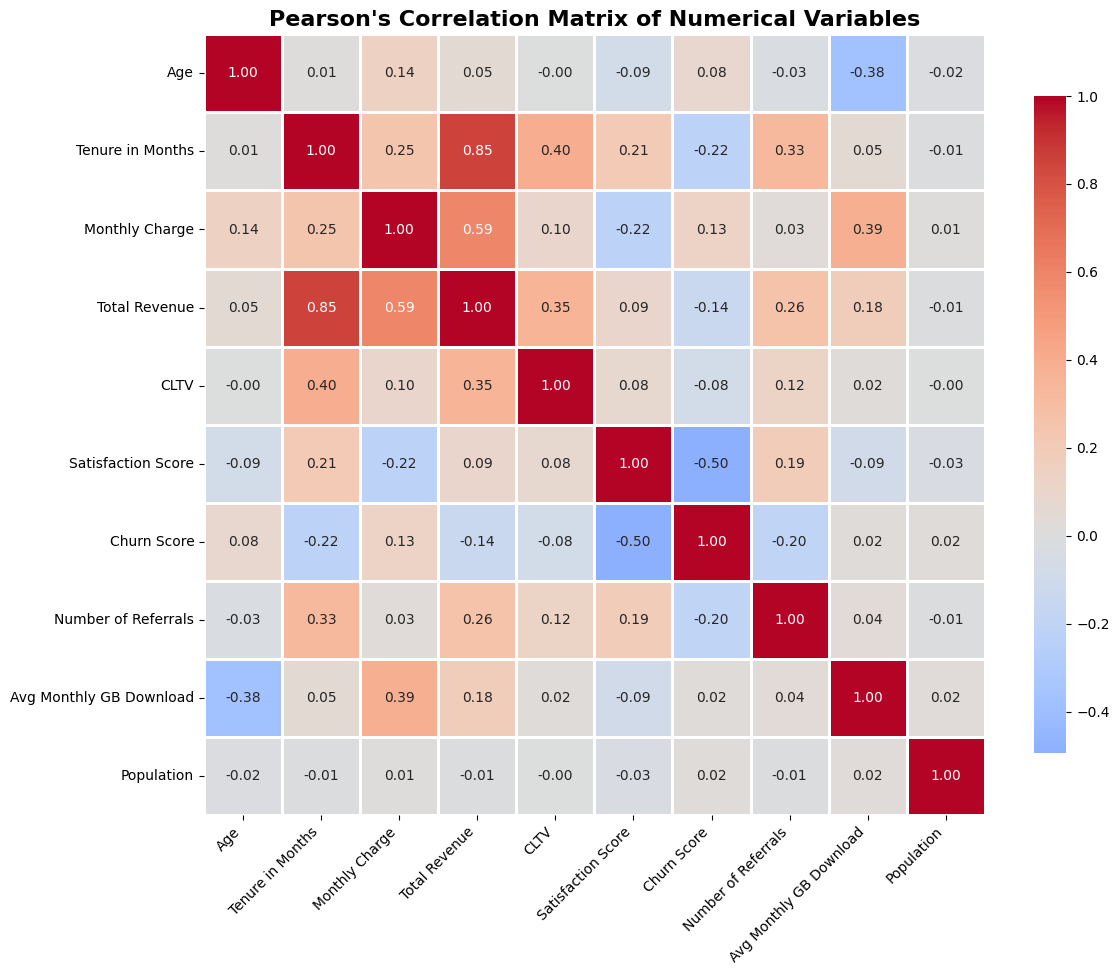

Pearson's Correlation heatmap displayed and saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/correlation_heatmap.png


<Figure size 640x480 with 0 Axes>

In [24]:
# corr_matrix is a Polars DataFrame from: corr_matrix = df.select(corr_cols).corr()

# 1) Extract variable names from Polars'
if "column" in corr_matrix.columns:
    names = corr_matrix.get_column("column").to_list()
    vals_pl = corr_matrix.drop("column")
else:
    names = corr_cols
    vals_pl = corr_matrix

# 2) Convert values to pandas and set both axes labels
corr_pd = vals_pl.to_pandas()
corr_pd.index = names
corr_pd.columns = names

# 3) Display the heat map
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_pd.astype(float),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
)
plt.title("Pearson's Correlation Matrix of Numerical Variables", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()

# Show and save
plt.show()
heatmap_path = f"{output_path}correlation_heatmap.png"
plt.savefig(heatmap_path, dpi=300, bbox_inches="tight")
print(f"Pearson's Correlation heatmap displayed and saved: {heatmap_path}")



**2.8 - Geographic analysis**  Not relevant because only one state. Probably using city will be better but even so, small cities with a small number of customers apears in the top ten.

In [25]:
geo_churn = (
    df.group_by("City")
      .agg([
          pl.count("Customer ID").alias("Total_Customers"),
          (pl.col("Churn Label") == "Yes").sum().alias("Churned_Customers")
      ])
      .with_columns(
          ((pl.col("Churned_Customers") / pl.col("Total_Customers")) * 100)
          .round(2)
          .alias("Churn_Rate")
      )
      .sort("Churn_Rate", descending=True)
)

# Save to CSV
geo_churn.write_csv(f"{output_path}churn_by_city.csv")
print(f"  ✓ Geographic churn analysis saved: {output_path}churn_by_city.csv")

# Show top 10 Cities
print("\nTop 10 Cities by Churn Rate:")
print(geo_churn.head(10))


  ✓ Geographic churn analysis saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/churn_by_city.csv

Top 10 Cities by Churn Rate:
shape: (10, 4)
┌──────────────────┬─────────────────┬───────────────────┬────────────┐
│ City             ┆ Total_Customers ┆ Churned_Customers ┆ Churn_Rate │
│ ---              ┆ ---             ┆ ---               ┆ ---        │
│ str              ┆ u32             ┆ u32               ┆ f64        │
╞══════════════════╪═════════════════╪═══════════════════╪════════════╡
│ Johannesburg     ┆ 2               ┆ 2                 ┆ 100.0      │
│ Smith River      ┆ 4               ┆ 4                 ┆ 100.0      │
│ Eldridge         ┆ 2               ┆ 2                 ┆ 100.0      │
│ Riverbank        ┆ 4               ┆ 4                 ┆ 100.0      │
│ Boulder Creek    ┆ 4               ┆ 4                 ┆ 100.0      │
│ South Lake Tahoe ┆ 2               ┆ 2                 ┆ 100.0      │
│ Twain            ┆ 4       

#3. FEATURE ENGINEERING

**3.1 - Creating Composite Features**

Based on our project goals and the data analysis from previous sections, we will now create the following composite features.

3.1.1 - Customer Longevity Ratio  
3.1.2 - Average Monthly Spend  
3.1.3 - Service Bundle Complexity Index  
3.1.4 - Revenue per Service  
3.1.5 - Has Dependents (binary)  
3.1.6 - Is Heavy User (based on data download)  
3.1.7 - CLTV per Month  
3.1.8 - Has Premium Services  
3.1.9 - Streaming Services Count  
3.1.10 - Customer Engagement Score (composite)  
3.1.11 - Population Density Category  
3.1.12 - Contract Value (encoding contract types)  
  
The code provides detailed information about each feature, including the formula used to calculate each one.

In [26]:
print("\n3.1. Creating new features...\n")
df_fe = df.clone()

#3.1.1 - Customer Longevity Ratio
df_fe = df_fe.with_columns(
    (pl.col("Tenure in Months") / pl.col("Age")).alias("Longevity_Ratio")
)

print("** Longevity_Ratio (Tenure / Age): Done ** ")

#3.1.2 - Average Monthly Spend
df_fe = df_fe.with_columns(
    (pl.col("Total Revenue") / (pl.col("Tenure in Months") + 1))
    .alias("Avg_Monthly_Spend")
)

print("** Avg_Monthly_Spend (Total Revenue / Tenure): Done ** ")

# 3.1.3 - Service Bundle Complexity Index
service_cols = [
    "Phone Service", "Internet Service", "Online Security", "Online Backup",
    "Device Protection Plan", "Premium Tech Support", "Streaming TV",
    "Streaming Movies", "Streaming Music", "Unlimited Data"
]

df_fe = df_fe.with_columns(
    pl.sum_horizontal([
        (pl.col(c) == "Yes").cast(pl.Int8) for c in service_cols
    ]).alias("Service_Bundle_Count")
)

print("** Service_Bundle_Count (Number of services subscribed): Done ** ")

# 3.1.4 - Revenue per Service
df_fe = df_fe.with_columns(
    (pl.col("Total Revenue") / (pl.col("Service_Bundle_Count") + 1))
    .alias("Revenue_per_Service")
)

print("** Revenue_per_Service (Total Revenue / Service Count): Done ** ")

# 3.1.5 - Has Dependents (binary)
df_fe = df_fe.with_columns(
    (pl.col("Number of Dependents") > 0)
    .cast(pl.Int8)
    .alias("Has_Dependents")
)

print("** Has_Dependents (Binary indicator): Done ** ")

# 3.1.6 - Is an Heavy User (based on data download)
median_download = df_fe.select(pl.col("Avg Monthly GB Download").median()).item()

df_fe = df_fe.with_columns(
    (pl.col("Avg Monthly GB Download") > median_download)
    .cast(pl.Int8)
    .alias("Is_Heavy_User")
)

print("** Is_Heavy_User (Above median data usage): Done ** ")

# 3.1.7 - CLTV per Month
"""
Customer Lifetime Value (CLTV) represents the total revenue (or profit)
a company expects to earn from a customer per month
"""
df_fe = df_fe.with_columns(
    (pl.col("CLTV") / (pl.col("Tenure in Months") + 1))
    .alias("CLTV_per_Month")
)

print("** CLTV_per_Month (CLTV / Tenure): Done ** ")

# 3.1.8 - Has Premium Services
premium_services = [
    "Online Security", "Online Backup",
    "Device Protection Plan", "Premium Tech Support"
]

df_fe = df_fe.with_columns(
    pl.any_horizontal([
        (pl.col(c) == "Yes") for c in premium_services
    ]).cast(pl.Int8).alias("Has_Premium_Services")
)

print("** Has_Premium_Services (Any premium service): Done ** ")

# 3.1.9 - Streaming Services Count
streaming_cols = ["Streaming TV", "Streaming Movies", "Streaming Music"]

df_fe = df_fe.with_columns(
    pl.sum_horizontal([
        (pl.col(c) == "Yes").cast(pl.Int8) for c in streaming_cols
    ]).alias("Streaming_Count")
)

print("** Streaming_Count (Number of streaming services): Done ** ")

# 3.1.10 - Customer Engagement Score (a kind of fidelization score)
tenure_max = df_fe.select(pl.col("Tenure in Months").max()).item()
referrals_max = df_fe.select(pl.col("Number of Referrals").max()).item()
services_max = df_fe.select(pl.col("Service_Bundle_Count").max()).item()

df_fe = df_fe.with_columns(
    (
        (pl.col("Tenure in Months") / tenure_max) * 0.3 +
        (pl.col("Number of Referrals") / (referrals_max + 1)) * 0.2 +
        (pl.col("Service_Bundle_Count") / services_max) * 0.2 +
        (pl.col("Satisfaction Score") / 5) * 0.3
    ).alias("Engagement_Score")
)

print("** Customer Engagement Score: Done ** ")

# 3.1.11 - Population Density Category
df_fe = df_fe.with_columns(
    pl.when((pl.col("Population") > 0) & (pl.col("Population") <= 30_000)).then(pl.lit("Low"))
     .when((pl.col("Population") > 30_000) & (pl.col("Population") <= 50_000)).then(pl.lit("Medium"))
     .when((pl.col("Population") > 50_000) & (pl.col("Population") <= 100_000)).then(pl.lit("High"))
     .otherwise(pl.lit(None))
     .cast(pl.Utf8)  # or .cast(pl.Categorical)
     .alias("Population_Density")
)

print("** Population_Density (Categorical): Done ** ")

# 3.1.12 - Contract Value (encoding contract types)
contract_value_map = {"Month-to-Month": 1, "One Year": 12, "Two Year": 24}

df_fe = df_fe.with_columns(
    pl.col("Contract")
    .replace(contract_value_map)
    .cast(pl.Int8)
    .alias("Contract_Value")
)

print("** Contract Value (encoding contract types): Done ** ")

#Save dataset with new features
print("\nSaving dataset with new features...\n")
df_fe.write_csv(output_path + "telco_churn_features.csv")

print(f"Dataset with new feature saved to: {output_path}telco_churn_features.csv")




3.1. Creating new features...

** Longevity_Ratio (Tenure / Age): Done ** 
** Avg_Monthly_Spend (Total Revenue / Tenure): Done ** 
** Service_Bundle_Count (Number of services subscribed): Done ** 
** Revenue_per_Service (Total Revenue / Service Count): Done ** 
** Has_Dependents (Binary indicator): Done ** 
** Is_Heavy_User (Above median data usage): Done ** 
** CLTV_per_Month (CLTV / Tenure): Done ** 
** Has_Premium_Services (Any premium service): Done ** 
** Streaming_Count (Number of streaming services): Done ** 
** Customer Engagement Score: Done ** 
** Population_Density (Categorical): Done ** 
** Contract Value (encoding contract types): Done ** 

Saving dataset with new features...

Dataset with new feature saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/telco_churn_features.csv


**3.2. Feature importance preview (correlation with churn)**


In [27]:
print("\n3.2. New Features Correlation with Churn...\n")

new_features = [
    "Longevity_Ratio", "Avg_Monthly_Spend", "Service_Bundle_Count",
    "Revenue_per_Service", "CLTV_per_Month", "Engagement_Score", "Contract_Value"
]

df_fe = df_fe.with_columns(
    (pl.col("Churn Label") == "Yes").cast(pl.Int8).alias("Churn_Binary")
)

corr_row = df_fe.select([
    pl.corr(pl.col(feat), pl.col("Churn_Binary")).alias(feat)
    for feat in new_features
])

corr_with_churn = (
    corr_row
    .melt(variable_name="feature", value_name="correlation")
    .sort("correlation", descending=True)
)

print("\nCorrelation with Churn:\n")
print(corr_with_churn)




3.2. New Features Correlation with Churn...


Correlation with Churn:

shape: (7, 2)
┌──────────────────────┬─────────────┐
│ feature              ┆ correlation │
│ ---                  ┆ ---         │
│ str                  ┆ f64         │
╞══════════════════════╪═════════════╡
│ CLTV_per_Month       ┆ 0.31974     │
│ Avg_Monthly_Spend    ┆ 0.035721    │
│ Service_Bundle_Count ┆ 0.013102    │
│ Revenue_per_Service  ┆ -0.298321   │
│ Longevity_Ratio      ┆ -0.316196   │
│ Contract_Value       ┆ -0.43267    │
│ Engagement_Score     ┆ -0.574705   │
└──────────────────────┴─────────────┘


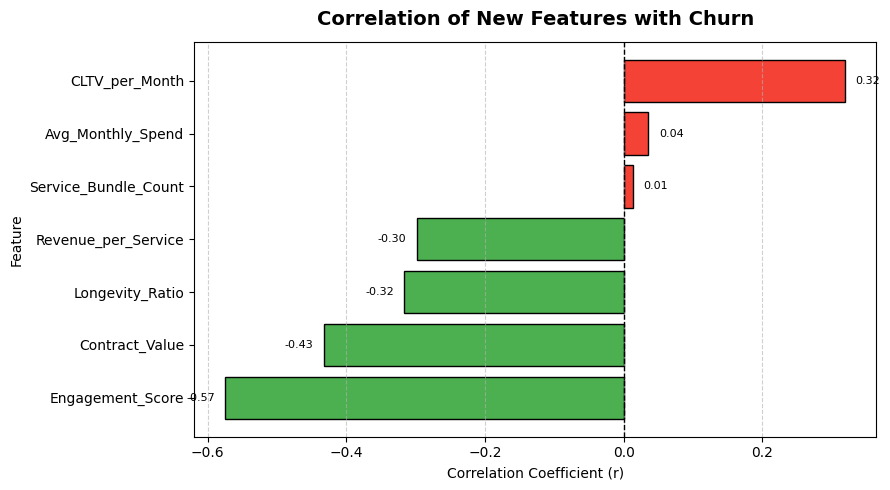

In [28]:
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

corr_pd = corr_with_churn.to_pandas().sort_values("correlation", ascending=True)

colors = np.where(corr_pd["correlation"] < 0, "#4CAF50", "#F44336")

# --- Plot ---
plt.figure(figsize=(9, 5))
bars = plt.barh(corr_pd["feature"], corr_pd["correlation"], color=colors, edgecolor="black")

plt.title("Correlation of New Features with Churn", fontsize=14, weight="bold", pad=12)
plt.xlabel("Correlation Coefficient (r)", fontsize=10)
plt.ylabel("Feature", fontsize=10)
plt.axvline(0, color="black", linestyle="--", linewidth=1)

# Annotate bars with correlation values
for bar, value in zip(bars, corr_pd["correlation"]):
    plt.text(value + (0.015 if value >= 0 else -0.015),
             bar.get_y() + bar.get_height()/2,
             f"{value:.2f}",
             va="center",
             ha="left" if value >= 0 else "right",
             fontsize=8)

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


The correlation table gives a clear quantitative view of how each engineered feature relates to churn probability. Lets try to explain each one with a little more detail:  

**CLTV_per_Month (0.32):** Positive and moderate — customers generating higher lifetime value per month tend to churn slightly more. This may indicate that some high-value customers are price-sensitive or expect premium service quality; when disappointed, they leave.  

**Avg_Monthly_Spend (0.04):** Almost neutral — spending alone doesn’t explain churn. Customers paying more aren’t necessarily more or less likely to churn.

**Service_Bundle_Count (0.01):** Essentially no relationship — the number of subscribed services doesn’t predict churn, suggesting customers churn regardless of how many services they have.

**Revenue_per_Service (-0.30)**: Moderate negative — customers who derive more revenue per service are less likely to churn. This could reflect better perceived value or usage intensity.  

**Longevity_Ratio (-0.32):** Moderate negative — customers whose tenure relative to age is higher are more loyal. This makes sense: longer relationships imply higher retention.  

**Contract_Value (-0.43):** Strong negative — the longer the contract (one-year/two-year), the lower the churn. This is a key business insight: long-term contracts are an effective retention mechanism.  

**Engagement_Score (-0.57):** Strong negative — the most predictive feature. Highly engaged customers (long tenure, satisfied, many services, referrals) rarely churn. Engagement is the best proxy for loyalty.

# **Major Insights**

**1. Engagement_Score** and **Contract_Value** are the most powerful anti-churn indicators. They should feature prominently in any churn prediction model.  

**2. CLTV_per_Month** shows an interesting positive correlation: some high-value customers are at higher churn risk. These customers may be “attractive defectors” and they should be the target for proactive retention strategies.  

**3.** The weak correlations for **Avg_Monthly_Spend** and **Service_Bundle_Count** indicate that volume alone doesnt drive loyalty.

**4. Longevity_Ratio** and **Revenue_per_Service** add moderate explanatory power and complement the stronger features.

# **Costumer Strategy**

**Customer segmentation:** Target high CLTV, high spend, but low engagement customers with personalized retention actions.

**Contract strategy:** Encourage upgrades from monthly to annual contracts; it has measurable impact on churn.

**Predictive modeling:** Keep Engagement_Score and Contract_Value as key predictors; consider interaction terms with CLTV for richer insights.




# 4. PREDICTIVE MODELLING

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, f1_score, precision_score

print("\n4.1 - Preparing data for modeling...\n")

# Define categorical and numerical features
categorical_features = [
    "Gender", "Senior Citizen", "Married", "Dependents",
    "Contract", "Paperless Billing", "Payment Method",
    "Internet Type", "Phone Service", "Multiple Lines",
    "Online Security", "Online Backup", "Device Protection Plan",
    "Premium Tech Support", "Streaming TV", "Streaming Movies",
    "Streaming Music", "Unlimited Data"
]

numerical_features = [
    "Age", "Number of Dependents", "Tenure in Months",
    "Monthly Charge", "Total Revenue", "CLTV", "Satisfaction Score",
    "Churn Score", "Number of Referrals", "Avg Monthly GB Download",
    "Population", "Longevity_Ratio", "Avg_Monthly_Spend",
    "Service_Bundle_Count", "Revenue_per_Service", "CLTV_per_Month",
    "Engagement_Score", "Contract_Value", "Streaming_Count"
]

# Check for possible missing_cols in df_fe
missing_cols = [col for col in categorical_features + numerical_features if col not in df_fe.columns]
if missing_cols:
    print(f"Missing columns in dataset: {missing_cols}")
else:
    print("All modeling feature columns verified in DataFrame.")

# Create a clean dataset for modeling
df_model = df_fe.clone()

print("\nHandling missing values...\n")

# Fill numeric null values with column median
for col in numerical_features:
    median_val = df_model.select(pl.col(col).median()).item()
    df_model = df_model.with_columns(
        pl.col(col).fill_null(median_val)
    )

# Fill categorical columns with their mode (most frequent value)
for col in categorical_features:
    mode_val = (
        df_model.select(pl.col(col).mode().first())
        .to_series()[0]
        if df_model.select(pl.col(col).is_not_null().sum()).item() > 0
        else None
    )
    if mode_val is not None:
        df_model = df_model.with_columns(
            pl.col(col).fill_null(mode_val)
        )

print("Missing values handled (median for numeric, mode for categorical).\n")

print("Encoding categorical variables...\n")

for col in categorical_features:
    unique_vals = df_model.select(pl.col(col).unique()).to_series().to_list()
    mapping = {val: idx for idx, val in enumerate(sorted(unique_vals))}

    df_model = df_model.with_columns(
        pl.col(col).replace(mapping).cast(pl.Int32).alias(col + "_encoded")
    )

print("Categorical variables encoded as numeric codes.\n")



4.1 - Preparing data for modeling...

All modeling feature columns verified in DataFrame.

Handling missing values...

Missing values handled (median for numeric, mode for categorical).

Encoding categorical variables...

Categorical variables encoded as numeric codes.



In [58]:
display(df_model)

Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,…,CLTV,Churn Category,Churn Reason,Population,Age_Group,Tenure_Group,Longevity_Ratio,Avg_Monthly_Spend,Service_Bundle_Count,Revenue_per_Service,Has_Dependents,Is_Heavy_User,CLTV_per_Month,Has_Premium_Services,Streaming_Count,Engagement_Score,Population_Density,Contract_Value,Churn_Binary,Gender_encoded,Senior Citizen_encoded,Married_encoded,Dependents_encoded,Contract_encoded,Paperless Billing_encoded,Payment Method_encoded,Internet Type_encoded,Phone Service_encoded,Multiple Lines_encoded,Online Security_encoded,Online Backup_encoded,Device Protection Plan_encoded,Premium Tech Support_encoded,Streaming TV_encoded,Streaming Movies_encoded,Streaming Music_encoded,Unlimited Data_encoded
str,i64,str,f64,str,str,str,str,f64,str,str,str,i64,str,f64,f64,str,str,f64,f64,str,str,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,…,f64,str,str,f64,str,str,f64,f64,f64,f64,i8,i8,f64,i8,f64,f64,str,f64,i8,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32
"""8779-QRDMV""",1,"""Male""",78.0,"""No""","""Yes""","""No""","""No""",0.0,"""United States""","""California""","""Los Angeles""",90022,"""34.02381, -118.156582""",34.02381,-118.156582,"""Q3""","""No""",0.0,1.0,"""None""","""No""",0.0,"""No""","""Yes""","""DSL""",8.0,"""No""","""No""","""Yes""","""No""","""No""","""Yes""","""No""","""No""","""Month-to-Month""","""Yes""",…,5433.0,"""Competitor""","""Competitor offered more data""",68701.0,"""65+""","""0-12m""",0.012821,29.825,3.0,14.9125,0,0,2716.5,1,1.0,0.244167,"""High""",1.0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
"""7495-OOKFY""",1,"""Female""",74.0,"""No""","""Yes""","""Yes""","""Yes""",1.0,"""United States""","""California""","""Los Angeles""",90063,"""34.044271, -118.185237""",34.044271,-118.185237,"""Q3""","""Yes""",1.0,8.0,"""Offer E""","""Yes""",48.85,"""Yes""","""Yes""","""Fiber Optic""",17.0,"""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Yes""","""Month-to-Month""","""Yes""",…,5302.0,"""Competitor""","""Competitor made better offer""",55668.0,"""65+""","""0-12m""",0.108108,113.788889,4.0,204.82,1,0,589.111111,1,0.0,0.31,"""High""",1.0,1,0,1,1,1,0,1,1,2,1,1,0,1,0,0,0,0,0,1
"""1658-BYGOY""",1,"""Male""",71.0,"""No""","""Yes""","""No""","""Yes""",3.0,"""United States""","""California""","""Los Angeles""",90065,"""34.108833, -118.229715""",34.108833,-118.229715,"""Q3""","""No""",0.0,18.0,"""Offer D""","""Yes""",11.33,"""Yes""","""Yes""","""Fiber Optic""",52.0,"""No""","""No""","""No""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Month-to-Month""","""Yes""",…,3179.0,"""Competitor""","""Competitor made better offer""",47534.0,"""65+""","""12-24m""",0.253521,100.572632,6.0,272.982857,1,1,167.315789,0,3.0,0.315,"""Medium""",1.0,1,1,1,0,1,0,1,0,2,1,1,0,0,0,0,1,1,1,1
"""4598-XLKNJ""",1,"""Female""",78.0,"""No""","""Yes""","""Yes""","""Yes""",1.0,"""United States""","""California""","""Inglewood""",90303,"""33.936291, -118.332639""",33.936291,-118.332639,"""Q3""","""Yes""",1.0,25.0,"""Offer C""","""Yes""",19.76,"""No""","""Yes""","""Fiber Optic""",12.0,"""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Month-to-Month""","""Yes""",…,5337.0,"""Dissatisfaction""","""Limited range of services""",27778.0,"""65+""","""24-48m""",0.320513,115.195,7.0,374.38375,1,0,205.269231,1,2.0,0.380833,"""Low""",1.0,1,0,1,1,1,0,1,0,2,1,0,0,1,1,0,1,1,0,1
"""4846-WHAFZ""",1,"""Female""",80.0,"""No""","""Yes""","""Yes""","""Yes""",1.0,"""United States""","""California""","""Whittier""",90

In [39]:
print("\n4.2 - Preparing feature matrix and target...\n")

encoded_categorical = [col + "_encoded" for col in categorical_features]

X = df_model.select(numerical_features + encoded_categorical)
y = df_model.select("Churn_Binary")

print(f"  - Feature matrix shape: {X.shape}")

# Convert to pandas for sklearn and compute distribution there
X_pd = X.to_pandas()
y_pd = y.to_pandas().squeeze()   # single-column DF -> Series
print(f"  - Target distribution: {y_pd.value_counts().to_dict()}")

print("\nSplitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_pd, y_pd, test_size=0.2, random_state=42, stratify=y_pd
)
print(f"  - Training set: {X_train.shape}")
print(f"  - Test set: {X_test.shape}")

print("\nScaling numerical features...")
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("\nNumerical features scaled and data ready for modeling.\n")



4.2 - Preparing feature matrix and target...

  - Feature matrix shape: (7043, 37)
  - Target distribution: {0: 5174, 1: 1869}

Splitting data into train and test sets...
  - Training set: (5634, 37)
  - Test set: (1409, 37)

Scaling numerical features...

Numerical features scaled and data ready for modeling.



In [43]:
print("\n4.3. Training predictive models...")

models = {}
predictions = {}
probabilities = {}

print("\n  Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model
predictions['Logistic Regression'] = lr_model.predict(X_test_scaled)
probabilities['Logistic Regression'] = lr_model.predict_proba(X_test_scaled)[:, 1]
print("\n  Logistic Regression trained")



4.3. Training predictive models...

  Training Logistic Regression...

  Logistic Regression trained


In [44]:
print("\n  Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_model.predict(X_test)
probabilities['Random Forest'] = rf_model.predict_proba(X_test)[:, 1]
print("\n  Random Forest trained")


  Training Random Forest...

  Random Forest trained


In [45]:
print("\n  Training XGBoost...")
# Calculate scale_pos_weight for imbalanced data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
xgb_model = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight,
                         learning_rate=0.1, max_depth=5, n_jobs=-1)
xgb_model.fit(X_train, y_train)
models['XGBoost'] = xgb_model
predictions['XGBoost'] = xgb_model.predict(X_test)
probabilities['XGBoost'] = xgb_model.predict_proba(X_test)[:, 1]
print("\n  XGBoost trained")


  Training XGBoost...

  XGBoost trained


#5. MODEL's EVALUATION

In [57]:
print("\n5.1. Model Performance Comparison...")

results = []
for model_name in models.keys():
    y_pred = predictions[model_name]
    y_prob = probabilities[model_name]

    # Calculate metrics
    accuracy = (y_pred == y_test).mean()
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"\n{model_name}:")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {precision:.4f}")
    print(f"  - Recall: {recall:.4f} {'MEETS TARGET (>0.80)' if recall > 0.80 else 'Below target'}")
    print(f"  - F1-Score: {f1:.4f}")
    print(f"  - ROC-AUC: {roc_auc:.4f}")

# Create results DataFrame (Polars)
results_df = pl.DataFrame(results)

# Save to CSV
results_df.write_csv(output_path + "model_comparison.csv")
print(f"\nModel comparison saved: {output_path}model_comparison.csv")



5.1. Model Performance Comparison...

Logistic Regression:
  - Accuracy: 0.9823
  - Precision: 0.9532
  - Recall: 0.9813 MEETS TARGET (>0.80)
  - F1-Score: 0.9671
  - ROC-AUC: 0.9990

Random Forest:
  - Accuracy: 0.9837
  - Precision: 0.9835
  - Recall: 0.9545 MEETS TARGET (>0.80)
  - F1-Score: 0.9688
  - ROC-AUC: 0.9987

XGBoost:
  - Accuracy: 0.9830
  - Precision: 0.9630
  - Recall: 0.9733 MEETS TARGET (>0.80)
  - F1-Score: 0.9681
  - ROC-AUC: 0.9990

Model comparison saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/model_comparison.csv



5.2. Generating confusion matrices...


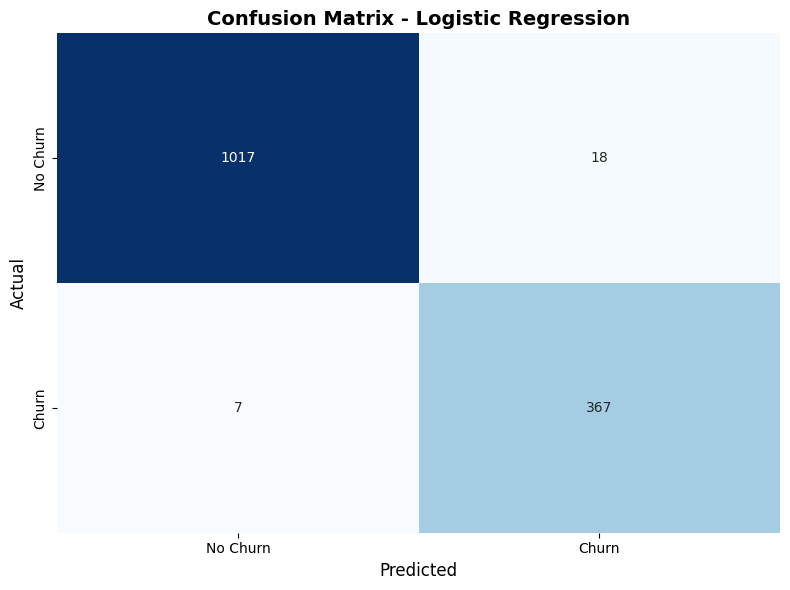

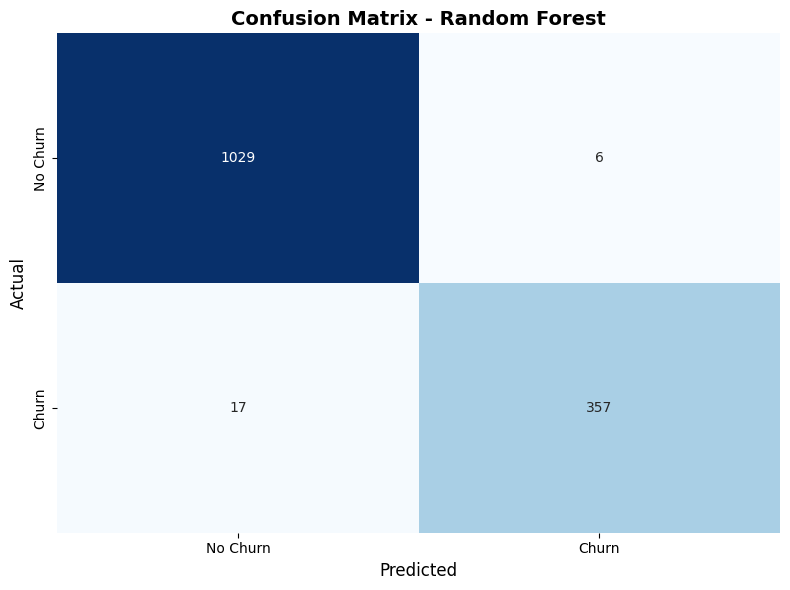

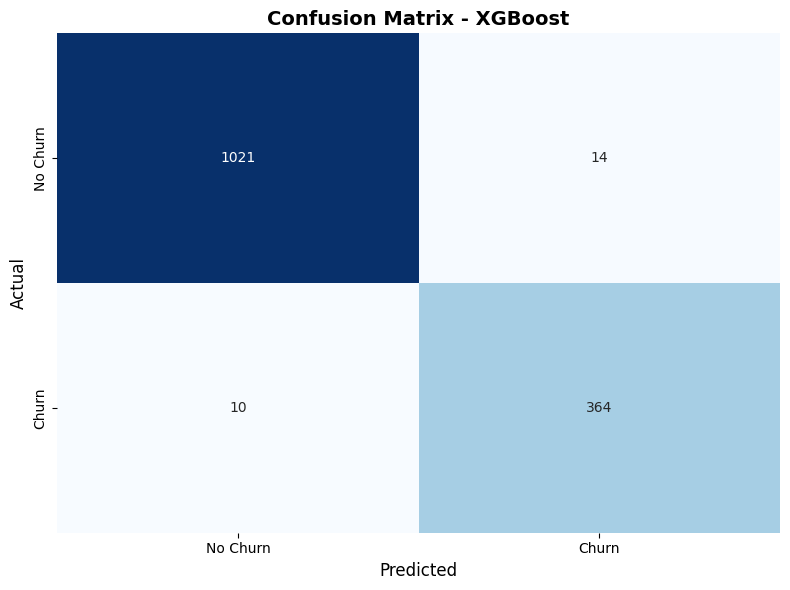


Confusion matrices saved to: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/



In [52]:
print("\n5.2. Generating confusion matrices...")

y_test_np = y_test.to_numpy() if isinstance(y_test, pl.Series) else y_test

for model_name, preds in predictions.items():
    y_pred_np = preds.to_numpy() if isinstance(preds, pl.Series) else preds
    cm = confusion_matrix(y_test_np, y_pred_np)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No Churn", "Churn"],
                yticklabels=["No Churn", "Churn"])
    plt.title(f"Confusion Matrix - {model_name}", fontsize=14, fontweight="bold")
    plt.ylabel("Actual", fontsize=12)
    plt.xlabel("Predicted", fontsize=12)
    plt.tight_layout()

    # show inline
    plt.show()

    # save after showing (optional)
    plt.savefig(output_path + f"confusion_matrix_{model_name.replace(' ', '_')}.png",
                dpi=300, bbox_inches="tight")
    plt.close()

print(f"\nConfusion matrices saved to: {output_path}\n")


5.3. Generating ROC curves...


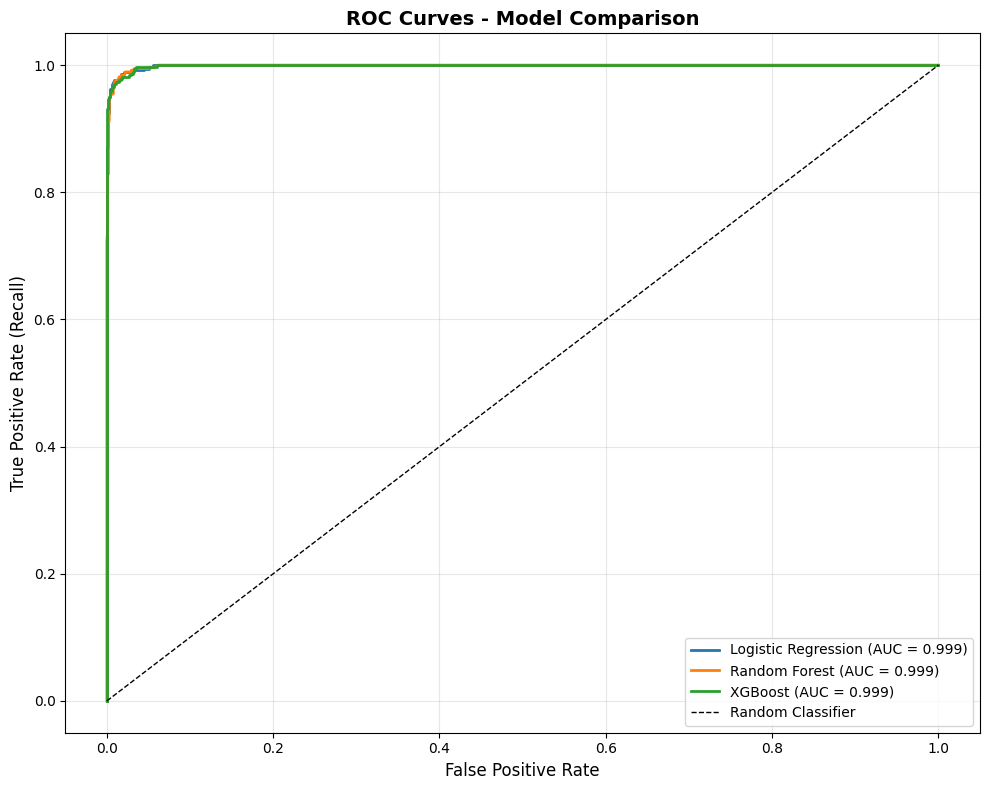

  ✓ ROC curves saved: /content/drive/MyDrive/Colab Notebooks/Bootcamp/Telco_Churn_Project/03_Outputs/roc_curves_comparison.png


In [54]:
#import matplotlib.pyplot as plt
#from sklearn.metrics import roc_curve, roc_auc_score
#import polars as pl

# 5.3. ROC Curves
print("\n5.3. Generating ROC curves...")

plt.figure(figsize=(10, 8))

# Convert y_test to numpy if stored as Polars
y_test_np = y_test.to_numpy() if isinstance(y_test, pl.Series) else y_test

for model_name, probs in probabilities.items():
    # Convert probabilities to numpy if Polars
    y_prob_np = probs.to_numpy() if isinstance(probs, pl.Series) else probs

    # Compute ROC components
    fpr, tpr, _ = roc_curve(y_test_np, y_prob_np)
    auc = roc_auc_score(y_test_np, y_prob_np)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.3f})", linewidth=2)

# Baseline diagonal
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier", linewidth=1)

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.title("ROC Curves - Model Comparison", fontsize=14, fontweight="bold")
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig(output_path + "roc_curves_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"  ✓ ROC curves saved: {output_path}roc_curves_comparison.png")



5.4. Feature Importance Analysis...
Random Forest feature importance saved
XGBoost feature importance saved


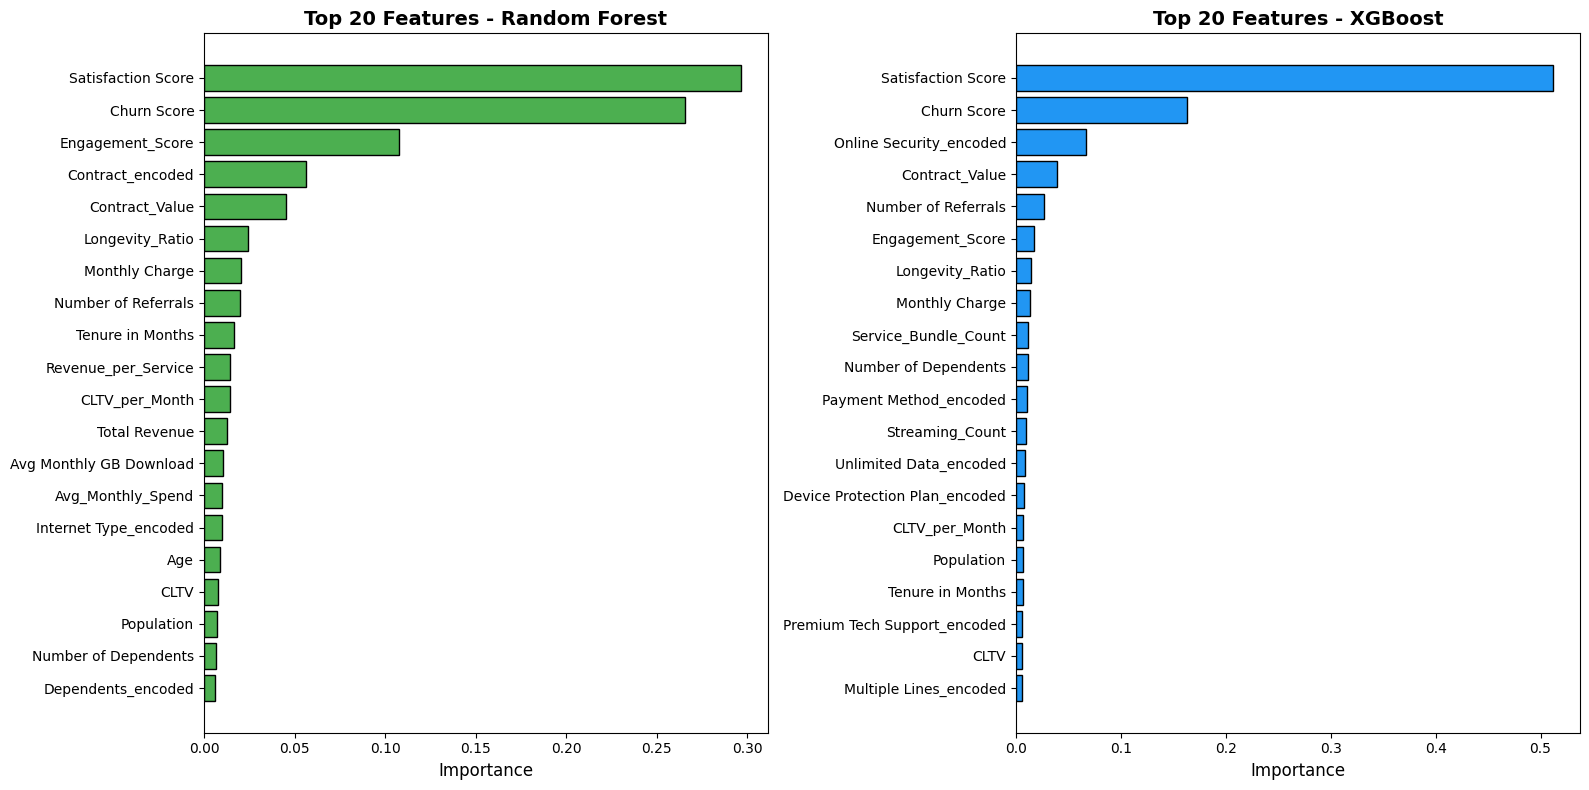

Feature importance visualization saved


In [56]:
print("\n5.4. Feature Importance Analysis...")

# --- Random Forest feature importance
rf_importance = pl.DataFrame({
    "Feature": X.columns,
    "Importance": models["Random Forest"].feature_importances_.tolist()
}).sort("Importance", descending=True)

rf_importance.write_csv(output_path + "feature_importance_rf.csv")
print("Random Forest feature importance saved")

# --- XGBoost feature importance
xgb_importance = pl.DataFrame({
    "Feature": X.columns,
    "Importance": models["XGBoost"].feature_importances_.tolist()
}).sort("Importance", descending=True)

xgb_importance.write_csv(output_path + "feature_importance_xgb.csv")
print("XGBoost feature importance saved")

# --- Visualization of Top 20 Features
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Convert to pandas for Matplotlib plotting convenience
rf_pd = rf_importance.head(20).to_pandas()
xgb_pd = xgb_importance.head(20).to_pandas()

# Random Forest
axes[0].barh(rf_pd["Feature"], rf_pd["Importance"], color="#4CAF50", edgecolor="black")
axes[0].set_xlabel("Importance", fontsize=12)
axes[0].set_title("Top 20 Features - Random Forest", fontsize=14, fontweight="bold")
axes[0].invert_yaxis()

# XGBoost
axes[1].barh(xgb_pd["Feature"], xgb_pd["Importance"], color="#2196F3", edgecolor="black")
axes[1].set_xlabel("Importance", fontsize=12)
axes[1].set_title("Top 20 Features - XGBoost", fontsize=14, fontweight="bold")
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig(output_path + "feature_importance_comparison.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()
print("Feature importance visualization saved")
